### IMPORTS

In [2]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to split the data
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from custom_adaboost import *

# to evaluate the models
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### ***2. Machine Learning Methods:***
#### 2.1. Apply at least 3 different machine learning methods
##### Apply at least 3 different machine learning methods on your selected problem. The methods should be selected from the ones covered in the course. None of the methods are allowed to be deep learning. For each method, you should test the effect of the hyperparameters and try to find a set of hyperparameter values that work well for your problem 
##### 2.2. You should apply all the concepts you learned in the course (such as Generalization and Combating Overfitting)
Our problem is a binary classification problem , and the labels are in the target column => Supervised Learning and Classification

#### Read and split dataset to test validation and test

In [3]:
# Read the original dataset
dataset = pd.read_csv('./dataset/final_dataset.csv')

# separate the features and labels
labels = dataset['Diabetes_binary']
features = dataset.drop('Diabetes_binary', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Read the resampled dataset
resampled_dataset = pd.read_csv('./dataset/resampled_dataset.csv')

# separate the features and labels
labels_resampled = resampled_dataset['Diabetes_binary']
features_resampled = resampled_dataset.drop('Diabetes_binary', axis=1)

x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled = train_test_split(features_resampled, labels_resampled, test_size=0.3, random_state=42)

### ***Adaboost Classifier***

Generally, decision tree-based algorithms perform well on imbalanced datasets. Similarly bagging and boosting based techniques are good choices for imbalanced classification problems.

#### Adaboost classifier with the original dataset

### Number of Estimators

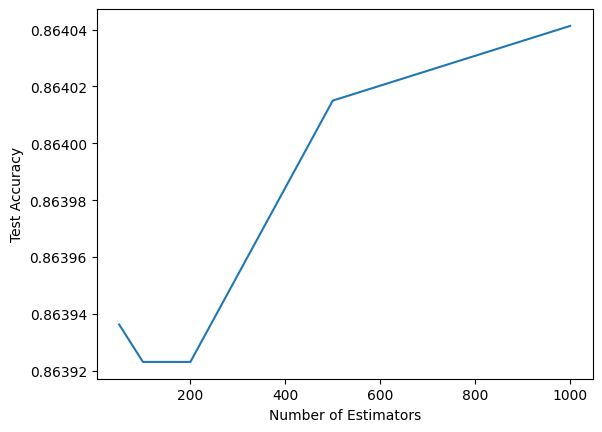

In [4]:
# Machine Learning Method 3: Adaboost Classifier

n_estimators_options = [50, 100, 200, 500, 1000] # try different number of estimators

test_accuracies = [] # the accuracy of the final model for each number of estimator
f1_scores = []

# loop on all the different options for the number of estimators
# the default base classifier is the decision tree
for n_estimators in n_estimators_options:

    # create the adaboost classifies with the current number of estimators
    model = AdaBoostClassifier(n_estimators=n_estimators)

    # fit the model => training
    model.fit(x_train, y_train)

    # predict the labels of the test set
    predictions = model.predict(x_test)

    # calculate the accuracy of the model on the test set
    test_accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    test_accuracies.append(test_accuracy)
    f1_scores.append(f1)

# plot the test accuracies for each number of estimators
plt.plot(n_estimators_options, test_accuracies)
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.show()

In [6]:
print("Test Accuracies" ,test_accuracies)
# Note: The accuracies are not very different for different number of estimators

print("F1 Scores:", f1_scores)

Test Accuracies [0.8639361925785767, 0.8639230526647745, 0.8639230526647745, 0.8640150320613896, 0.864041311888994]
F1 Scores: [0.23742543633551805, 0.23152270703472844, 0.23288888888888892, 0.23369122547204738, 0.23383931877082564]


### Learning Rate
Determine the weight for each classifier

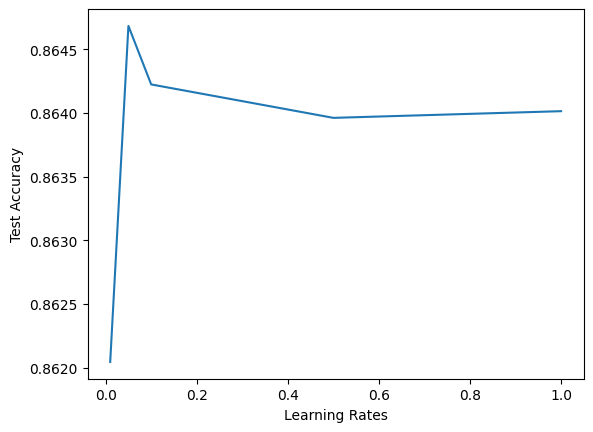

Test Accuracies [0.8620440449910649, 0.8646851676653001, 0.8642252706822243, 0.8639624724061811, 0.8640150320613896]
F1 Scores: [0.0, 0.1943357846972305, 0.22079782821808314, 0.23180232989537727, 0.23369122547204738]


In [7]:
# Try differen learning rates
n_estimators = 500 # use 100 estimators
learning_rate_options = [0.01, 0.05, 0.1, 0.5, 1] # try different learning rates => how much each model contributes to the final prediction 

test_accuracies_lr = []
f1_scores_lr = []

for learning_rate in learning_rate_options:
    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    test_accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    test_accuracies_lr.append(test_accuracy)
    f1_scores_lr.append(f1)


# plot the test accuracies for each number of estimators
plt.plot(learning_rate_options, test_accuracies_lr)
plt.xlabel('Learning Rates')
plt.ylabel('Test Accuracy')
plt.show()

print("Test Accuracies" ,test_accuracies_lr)
print("F1 Scores:", f1_scores_lr)

Train Accuracy:  0.8629375591296121
Test Accuracy:  0.8639230526647745
F1 Score: 0.23152270703472844
Confusion Matrix: 
 [[64188  1417]
 [ 8939  1560]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     65605
           1       0.52      0.15      0.23     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.58     76104
weighted avg       0.83      0.86      0.83     76104



<Axes: >

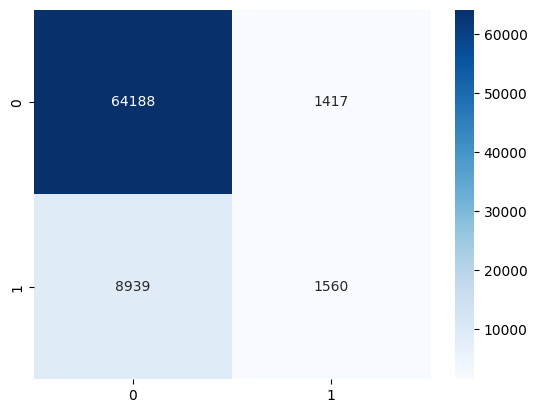

In [9]:
# Trying with number of estimators = 100 and learning rate = 1
n_estimators = 100
learning_rate = 1

# build model
model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)

# train model
model.fit(x_train, y_train)

# Evaluate model
y_predicted_train = model.predict(x_train)
y_predicted_test = model.predict(x_test)

train_accuracy = accuracy_score(y_train, y_predicted_train)
test_accuracy = accuracy_score(y_test, y_predicted_test)
f1 = f1_score(y_test, y_predicted_test)
conf_matrix = confusion_matrix(y_test, y_predicted_test)
class_report = classification_report(y_test, y_predicted_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("F1 Score:", f1)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

# plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

Train Accuracy:  0.9600227508221831
Test Accuracy:  0.8004047093451067
F1 Score: 0.29151119402985076
Confusion Matrix: 
 [[57789  7816]
 [ 7374  3125]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     65605
           1       0.29      0.30      0.29     10499

    accuracy                           0.80     76104
   macro avg       0.59      0.59      0.59     76104
weighted avg       0.80      0.80      0.80     76104



<Axes: >

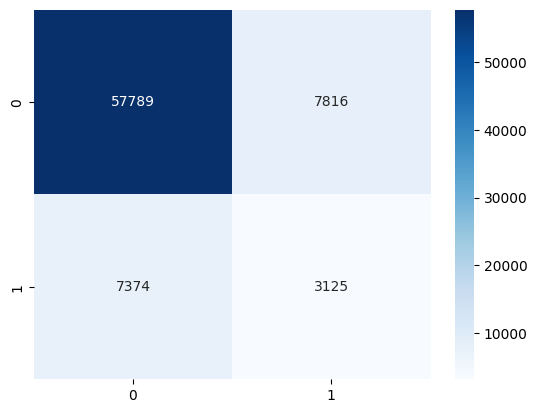

In [15]:
# Trying with number of estimators = 100 and learning rate = 1
n_estimators = 100
learning_rate = 1

# build model
model = AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced') ,n_estimators=n_estimators, learning_rate=learning_rate)

# train model
model.fit(x_train, y_train)

# Evaluate model
y_predicted_train = model.predict(x_train)
y_predicted_test = model.predict(x_test)

train_accuracy = accuracy_score(y_train, y_predicted_train)
test_accuracy = accuracy_score(y_test, y_predicted_test)
f1 = f1_score(y_test, y_predicted_test)
conf_matrix = confusion_matrix(y_test, y_predicted_test)
class_report = classification_report(y_test, y_predicted_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("F1 Score:", f1)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

# plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

Train Accuracy:  0.9587361409638594
Test Accuracy:  0.8381768078106274
F1 Score: 0.8463428600421852
Confusion Matrix: 
 [[51420 14174]
 [ 7025 58382]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83     65594
           1       0.80      0.89      0.85     65407

    accuracy                           0.84    131001
   macro avg       0.84      0.84      0.84    131001
weighted avg       0.84      0.84      0.84    131001

[0.02888214 0.02664644 0.01120528 0.03655451 0.00469679 0.00958764
 0.01157538 0.03158164 0.02909332 0.00700905 0.00718623 0.00691105
 0.11710967 0.0955386  0.06546897 0.01034769 0.02523629 0.14089652
 0.23012292 0.09357369 0.01077618]


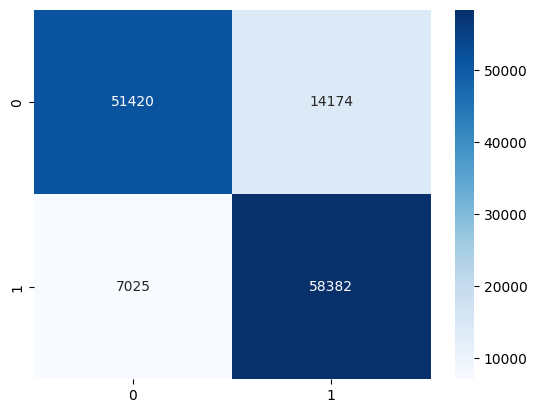

In [17]:
# Trying with number of estimators = 100 and learning rate = 1
n_estimators = 100
learning_rate = 1

# build model
model = AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced') ,n_estimators=n_estimators, learning_rate=learning_rate)

# train model
model.fit(x_train_resampled, y_train_resampled)

# Evaluate model
y_predicted_train = model.predict(x_train_resampled)
y_predicted_test = model.predict(x_test_resampled)

train_accuracy = accuracy_score(y_train_resampled, y_predicted_train)
test_accuracy = accuracy_score(y_test_resampled, y_predicted_test)
f1 = f1_score(y_test_resampled, y_predicted_test)
conf_matrix = confusion_matrix(y_test_resampled, y_predicted_test)
class_report = classification_report(y_test_resampled, y_predicted_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("F1 Score:", f1)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

# plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

print(model.feature_importances_)

#### Coments on the result:
It is clear that the problem is that the data is imbalanced and the accuracy metrics for the minority class (0) is affecting the total accuracy and f1 score of the model
=> Revisit data preprocessing <br> <br>

Without any data altering: <br>
Train Accuracy:  0.8629375591296121 <br> 
Test Accuracy:  0.8639230526647745 <br> <br>
Confusion Matrix: <br> 
 [[64188  1417] <br>
 [ 8939  1560]] <br> <br>
Classification Report: <br>
               precision    recall  f1-score   support <br>

           0       0.88      0.98      0.93     65605
           1       0.52      0.15      0.23     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.58     76104 <br>
weighted avg       0.83      0.86      0.83     76104 <br>

Comments: <br>
The recall of class 1 (diabetic - true positives) is very low which, in our case, is a problem since this means that it fails to correctly diagnose if a person is diabetic (hayah aw moot)
The precision is also relitavely low and consequently the f1 score <br>

To compensate this imbalance: <br>

1. First we try a over sampling technique called SMOTE (Synthetic Minority Over-Sampling Technique) which synthesizes new data for the minority class that based on the current data points. It finds tqo points from the minority class, and constructs new datapoints that are classified as diabetic until the dataset becomes balanced.


Train Accuracy:  0.7447614560943772
Test Accuracy:  0.7477118495278662
F1 Score: 0.7561713366679946
Confusion Matrix: 
 [[46703 18891]
 [14159 51248]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74     65594
           1       0.73      0.78      0.76     65407

    accuracy                           0.75    131001
   macro avg       0.75      0.75      0.75    131001
weighted avg       0.75      0.75      0.75    131001



<Axes: >

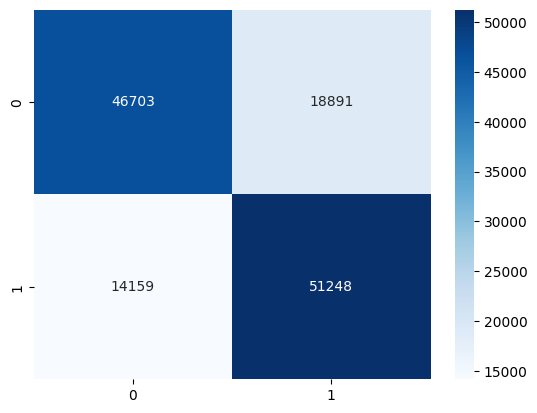

In [11]:
# Trying with number of estimators = 100 and learning rate = 1
n_estimators = 100
learning_rate = 1

# build model
model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)

# train model
model.fit(x_train_resampled, y_train_resampled)

# Evaluate model
y_predicted_train = model.predict(x_train_resampled)
y_predicted_test = model.predict(x_test_resampled)

train_accuracy = accuracy_score(y_train_resampled, y_predicted_train)
test_accuracy = accuracy_score(y_test_resampled, y_predicted_test)
f1 = f1_score(y_test_resampled, y_predicted_test)
conf_matrix = confusion_matrix(y_test_resampled, y_predicted_test)
class_report = classification_report(y_test_resampled, y_predicted_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("F1 Score:", f1)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)

# plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

Handling Imbalanced Data: <br>
1. Applying SMOTE (Synthetic Minority Over-Sampling Technique): <br>
Results: <br>
Train Accuracy:  0.7445880647894604 <br>
Test Accuracy:  0.7463530812741888 <br> <br>
Confusion Matrix: <br>
 [[46647 18947] <br>
 [14281 51126]] <br> <br>
Classification Report: <br>
               precision    recall  f1-score   support <br>

           0       0.77      0.71      0.74     65594
           1       0.73      0.78      0.75     65407

    accuracy                           0.75    131001 <br>
   macro avg       0.75      0.75      0.75    131001 <br>
weighted avg       0.75      0.75      0.75    131001 <br>

The recall, precision and f1 score for class 1 (diabetic) increased significantly on the other hand, the recall precision and f1 score of class 0 (non-diabetic decreased slightly) and the overall accuracy decreased by 10%. Over-Sampling also increases the chance of overfitting since it replicates minority class events.

In this case this could be a good thing since falsely diagnosing a non diabetic person is less severe than falsely diagnosing a diabetic person, however we will try to increase both by adjusting the loss function.
2. Adjusting the loss function to give more weight to missclassified smaples. The question is should this be done for the resampled or original data? استنونا في الحلقة القادمة

#### **Custom AdaBoost**

In [12]:
# trying our own adaboost classifier => from lab
n_estimators = 100
weight_multipliers = [1.1, 1.25, 1.5, 2, 3]

train_accuracies = []
test_accuracies = []
predicted_tests = []

for weight_multiplier in weight_multipliers:
    train_accuracy, test_accuracy, predicted_train, predicted_test = get_scores(n_estimators, x_train, y_train, x_test, y_train, weight_multiplier)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    predicted_tests.append(predicted_test)

Train Accuracy:  0.8017524890751002
Test Accuracy:  0.0
Confusion Matrix: 
 [[56810  8795]
 [ 6262  4237]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88     65605
           1       0.33      0.40      0.36     10499

    accuracy                           0.80     76104
   macro avg       0.61      0.63      0.62     76104
weighted avg       0.82      0.80      0.81     76104



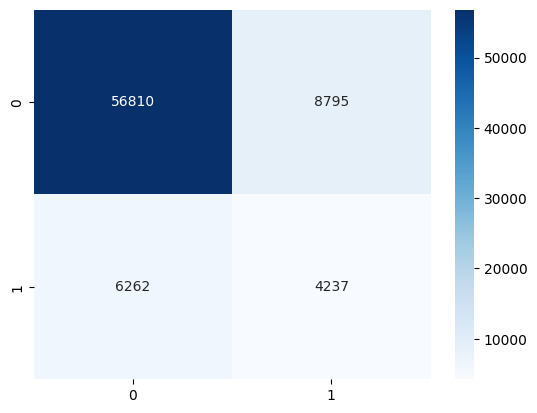

Train Accuracy:  0.8017524890751002
Test Accuracy:  0.0
Confusion Matrix: 
 [[56810  8795]
 [ 6262  4237]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88     65605
           1       0.33      0.40      0.36     10499

    accuracy                           0.80     76104
   macro avg       0.61      0.63      0.62     76104
weighted avg       0.82      0.80      0.81     76104



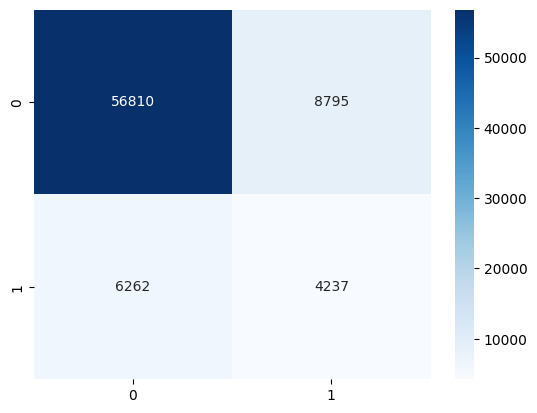

Train Accuracy:  0.8017524890751002
Test Accuracy:  0.0
Confusion Matrix: 
 [[56810  8795]
 [ 6262  4237]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88     65605
           1       0.33      0.40      0.36     10499

    accuracy                           0.80     76104
   macro avg       0.61      0.63      0.62     76104
weighted avg       0.82      0.80      0.81     76104



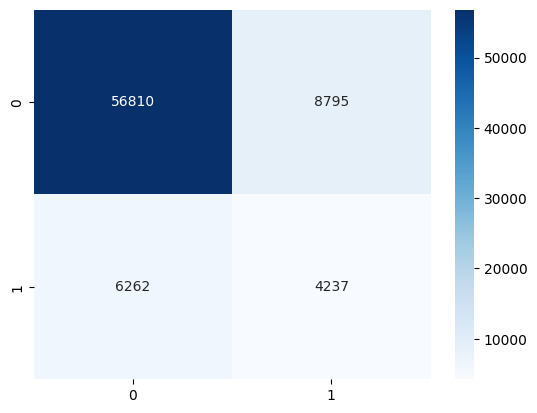

Train Accuracy:  0.7271984952921566
Test Accuracy:  0.0
Confusion Matrix: 
 [[48047 17558]
 [ 3284  7215]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.73      0.82     65605
           1       0.29      0.69      0.41     10499

    accuracy                           0.73     76104
   macro avg       0.61      0.71      0.62     76104
weighted avg       0.85      0.73      0.76     76104



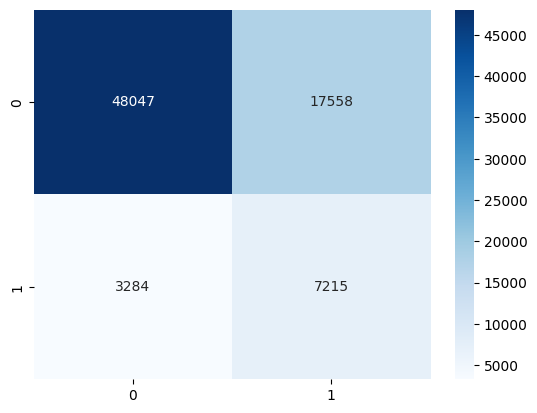

Train Accuracy:  0.6419617515880525
Test Accuracy:  0.0
Confusion Matrix: 
 [[40793 24812]
 [ 2576  7923]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.62      0.75     65605
           1       0.24      0.75      0.37     10499

    accuracy                           0.64     76104
   macro avg       0.59      0.69      0.56     76104
weighted avg       0.84      0.64      0.70     76104



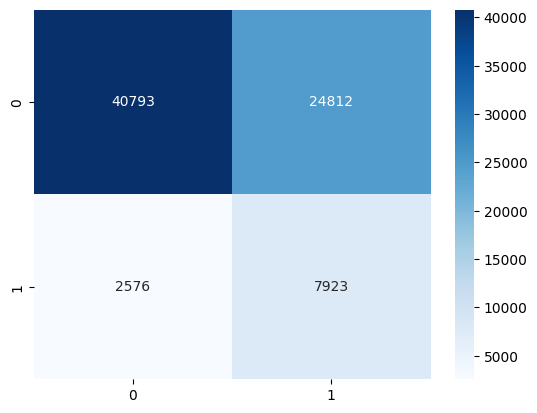

In [14]:
for train_accuracy, test_accuracy, predicted_test in zip(train_accuracies, test_accuracies, predicted_tests):
    
    conf_matrix = confusion_matrix(y_test, predicted_test)
    class_report = classification_report(y_test, predicted_test)

    print("Train Accuracy: ", train_accuracy)
    print("Test Accuracy: ", test_accuracy)
    print("Confusion Matrix: \n", conf_matrix)
    print("Classification Report: \n", class_report)

    # plot the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.show()

Increasing the weights => f1 score of the positive class = 0 ? => ***MULT***

In [ ]:
from custom_adaboost import * 
# trying our own adaboost classifier => from lab
n_estimators = 100
weight_multipliers = [1.1, 1.25, 1.5, 2, 2.5]

train_accuracies = []
test_accuracies = []
predicted_tests = []

for weight_multiplier in weight_multipliers:
    train_accuracy, test_accuracy, predicted_train, predicted_test = get_scores(n_estimators, x_train, y_train, x_test, y_train, weight_multiplier)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    predicted_tests.append(predicted_test)

Train Accuracy:  0.7406131509125944
Test Accuracy:  0.740376027663911
Confusion Matrix: 
 [[46747 18847]
 [15164 50243]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.71      0.73     65594
           1       0.73      0.77      0.75     65407

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001



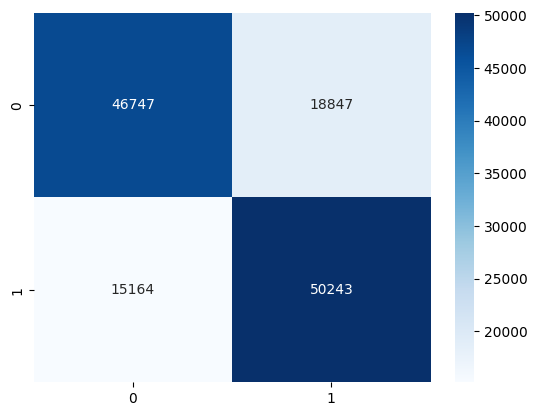

Train Accuracy:  0.7420624404989744
Test Accuracy:  0.742208074747521
Confusion Matrix: 
 [[46347 19247]
 [14524 50883]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.71      0.73     65594
           1       0.73      0.78      0.75     65407

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001



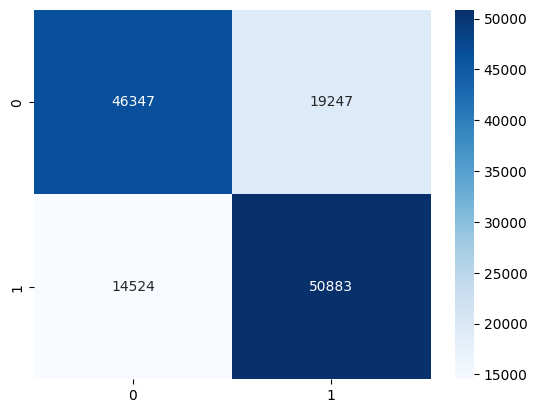

Train Accuracy:  0.7416502272080401
Test Accuracy:  0.7413378523828063
Confusion Matrix: 
 [[47141 18453]
 [15432 49975]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.72      0.74     65594
           1       0.73      0.76      0.75     65407

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001



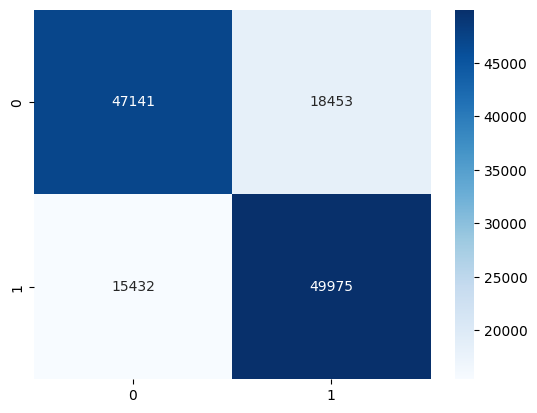

Train Accuracy:  0.7448792313203584
Test Accuracy:  0.7444523324249434
Confusion Matrix: 
 [[46189 19405]
 [14072 51335]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.70      0.73     65594
           1       0.73      0.78      0.75     65407

    accuracy                           0.74    131001
   macro avg       0.75      0.74      0.74    131001
weighted avg       0.75      0.74      0.74    131001



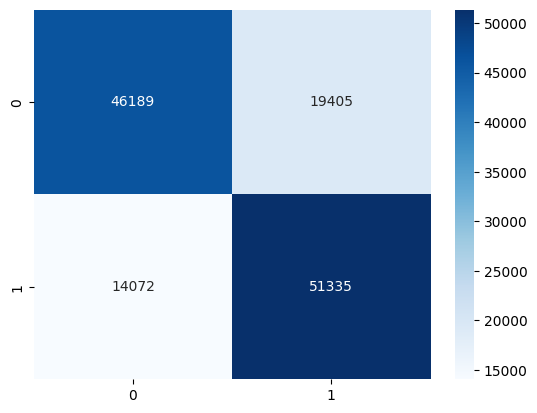

Train Accuracy:  0.745710200970337
Test Accuracy:  0.7454065236143236
Confusion Matrix: 
 [[46179 19415]
 [13937 51470]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.70      0.73     65594
           1       0.73      0.79      0.76     65407

    accuracy                           0.75    131001
   macro avg       0.75      0.75      0.74    131001
weighted avg       0.75      0.75      0.74    131001



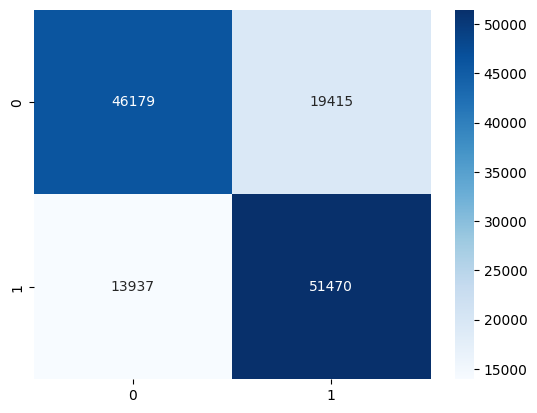

In [ ]:
for train_accuracy, test_accuracy, predicted_test in zip(train_accuracies, test_accuracies, predicted_tests):
    
    conf_matrix = confusion_matrix(y_train, predicted_test)
    class_report = classification_report(y_train, predicted_test)

    print("Train Accuracy: ", train_accuracy)
    print("Test Accuracy: ", test_accuracy)
    print("Confusion Matrix: \n", conf_matrix)
    print("Classification Report: \n", class_report)

    # plot the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.show()

### Cross Validation

In [9]:
# cross validation on original dataset
n_estimators = 100
learning_rate= 1

# Initialize the AdaBoost classifier
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced') ,n_estimators=n_estimators, learning_rate=learning_rate)

# Set up StratifiedKFold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List to store the accuracy scores for each fold
scores = []
f1_scores = []

features_cv = features.values
labels_cv = labels.values

# Train and test the model on each fold
for train_index, test_index in skf.split(features, labels):
    x_train_cv, x_test_cv = features_cv[train_index], features_cv[test_index]
    y_tarin_cv, y_test_cv = labels_cv[train_index], labels_cv[test_index]
    
    # Train the AdaBoost model
    adaboost.fit(x_train_cv, y_tarin_cv)
    
    # Make predictions on the test fold
    y_predicted_cv = adaboost.predict(x_test_cv)
    
    # Calculate accuracy and store it
    scores.append(accuracy_score(y_test_cv, y_predicted_cv))
    f1_scores.append(f1_score(y_test_cv, y_predicted_cv))

# Calculate and print the average accuracy
average_accuracy = np.mean(scores)
average_f1_score = np.mean(f1_scores)
print("Average accuracy across all folds:", average_accuracy)
print("F1 Score across all folds: ", average_f1_score)


Average accuracy across all folds: 0.7880045726900031
F1 Score across all folds:  0.2998507093044674


In [11]:
# cross validation on resampled dataset
n_estimators = 100
learning_rate= 1

# Initialize the AdaBoost classifier
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced') ,n_estimators=n_estimators, learning_rate=learning_rate)

# Set up StratifiedKFold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List to store the accuracy scores for each fold
scores = []
f1_scores = []

features_cv = features_resampled.values
labels_cv = labels_resampled.values

# Train and test the model on each fold
for train_index, test_index in skf.split(features_resampled, labels_resampled):
    x_train_cv, x_test_cv = features_cv[train_index], features_cv[test_index]
    y_tarin_cv, y_test_cv = labels_cv[train_index], labels_cv[test_index]
    
    # Train the AdaBoost model
    adaboost.fit(x_train_cv, y_tarin_cv)
    
    # Make predictions on the test fold
    y_predicted_cv = adaboost.predict(x_test_cv)
    
    # Calculate accuracy and store it
    scores.append(accuracy_score(y_test_cv, y_predicted_cv))
    f1_scores.append(f1_score(y_test_cv, y_predicted_cv))

# Calculate and print the average accuracy
average_accuracy = np.mean(scores)
average_f1_score = np.mean(f1_scores)
print("Average accuracy across all folds:", average_accuracy)
print("F1 Score across all folds: ", average_f1_score)


Average accuracy across all folds: 0.849501214899783
F1 Score across all folds:  0.8573364950790385
